# Recurrent Neural Network
Recurrent Neural Networks (RNNs) are a class of artificial neural networks specially designed to handle sequential data. Unlike traditional feedforward neural networks, where information flows in one direction (from input to output), RNNs have connections that loop back on themselves, allowing them to maintain a memory of past inputs. This looping mechanism enables RNNs to efficiently process sequential data of varying lengths. RNNs are typically trained using backpropagation through time (BPTT), an extension of the backpropagation algorithm that takes into account the temporal nature of the data. Gradient descent is used to adjust the network's parameters based on the error calculated at each time step. <br>

![image.png](https://miro.medium.com/v2/resize:fit:947/1*K6s4Li0fTl1pSX4-WPBMMA.jpeg)

<br>
Towards Long Short Term Memory
<br>

![image.png](https://miro.medium.com/v2/resize:fit:1194/1*B0q2ZLsUUw31eEImeVf3PQ.png)


## Opinion Mining (Sentiment Analysis) of Tweets

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

Find the Dataset using this link [Dataset Link](https://www.kaggle.com/code/benhamner/exploring-airline-twitter-sentiment-data?scriptVersionId=0)

Let's import the necessary modules

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import re

In [2]:
dataset = pd.read_csv("Tweets.csv")
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


Take only the necessary data for training and remove all the other data

In [3]:
dataset = dataset[["text","airline_sentiment"]]
dataset['text'] = dataset['text'].map(lambda x: x.lstrip('@VirginAmerica@UnitedAir@Southwestairline@DeltaAir@USAirways@American').rstrip('@'))
dataset.head()

,text,airline_sentiment
0,What @dhepburn said.,neutral
1,plus you've added commercials to the experien...,positive
2,I didn't today... Must mean I need to take an...,neutral
3,"it's really aggressive to blast obnoxious ""en...",negative
4,and it's a really big bad thing about it,negative


Plot the data count of airline sentiment

<Axes: xlabel='count', ylabel='airline_sentiment'>

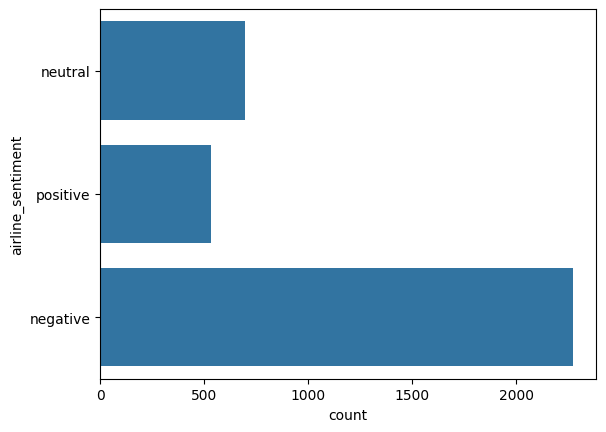

In [4]:
sns.countplot(dataset.airline_sentiment)

Remove the neutral sentiment from the dataset. There is going to be two way classification (Postive, or Negative)

In [5]:
dataset = dataset[dataset.airline_sentiment!="neutral"]
dataset['text'] = dataset['text'].apply(lambda x: x.lower()) # To lower
dataset['text'] = dataset['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

<ipython-input-5-4271e3d6392e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda x: x.lower()) # To lower
<ipython-input-5-4271e3d6392e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))


In [6]:
dataset.head()

,text,airline_sentiment
1,plus youve added commercials to the experienc...,positive
3,its really aggressive to blast obnoxious ente...,negative
4,and its a really big bad thing about it,negative
5,seriously would pay 30 a flight for seats tha...,negative
6,yes nearly every time i fly vx this ear worm ...,positive


Tokenize the tweets into different tokens as the split as the space ' '. After tokenizing it, change it to matrix, so that sequences can be padded

In [7]:
tokenizer = Tokenizer(num_words = 4000, split = ' ')
tokenizer.fit_on_texts(dataset['text'].values)

In [8]:
input_features = tokenizer.texts_to_matrix(dataset['text'].values)
input__features = pad_sequences(input_features)
output_target = dataset['airline_sentiment']

Encode the output target (Positive or Negative) into integers using LabelEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
output_target = encoder.fit_transform(output_target)

In [10]:
input_features

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
output_target

array([1, 0, 0, ..., 0, 0, 0])

## Split the dataset into training and testing

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(input_features, output_target,test_size=0.3)

# Let's print the data
print("\t \t \t \t Overall Notice \n \n \n")

print("\t \t The total number of records in Dataset: ",dataset.shape)
print("\t \t -----------------------------------------------------------")
print(f'\t \t The total number of training records for input parameters: {X_train.shape}')
print("\t \t -----------------------------------------------------------")
print(f'\t \t The total number of validation records for input parameters:{X_test.shape}')
print("\t \t -----------------------------------------------------------")

	 	 	 	 Overall Notice 
 
 

	 	 The total number of records in Dataset:  (2803, 2)
	 	 -----------------------------------------------------------
	 	 The total number of training records for input parameters: (1962, 4000)
	 	 -----------------------------------------------------------
	 	 The total number of validation records for input parameters:(841, 4000)
	 	 -----------------------------------------------------------


## Let's build the Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, RNN, SpatialDropout1D

Function to define the model

In [17]:
def RNN_Model(X_train):
  model = Sequential()
  model.add(Embedding(4000, 128, input_length = X_train.shape[1]))
  model.add(SpatialDropout1D(0.5))
  model.add(LSTM(196))
  model.add(Dropout(0.2))
  model.add(Dense(100, activation = 'relu'))
  model.add(Dense(2, activation = 'softmax'))
  model.compile(metrics = ['accuracy'], loss = 'mse', optimizer = "adam")
  return model


Let's fit the model with the training data

In [ ]:
model = RNN_Model(X_train)
model = model.fit(X_train, Y_train, epochs = 10, batch_size = 32)

Epoch 1/10
14/62 [=====>........................] - ETA: 11:12 - loss: 0.2500 - accuracy: 0.4576

Let's evaluate the model

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = False)
print("Loss = ", score[0])
print("Accuracy = ", score[1])

## Let's test the model with test data and plot the confusion matrix

In [ ]:
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
confusion_mtx = confusion_matrix(Y_test, y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(2))

Test with random sample

In [ ]:
sample = ['Meetings: Air crew is so dumb.']
sample = tokenizer.texts_to_sequences(sample)
sample = pad_sequences(sample, maxlen=31, dtype='int32', value=0)
print(sample)
sentiment = model.predict(sample,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")